## Lyapunov Exponent and Out-of-Time-Ordered Correlator’s Growth Rate

In [1]:
from numpy import *
import math
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import random as rand
from OTOCfunc import *
from LYAPfunc import *

In [2]:
N=2**14
T=2**-7
trials_OTOC=4
trials=4
K=logspace(-2,2,50)
Nkicks=30
Kick=arange(1,Nkicks+1,1)

mean_C=zeros([Nkicks,len(K),trials])
for kk in range(trials):
    mean_C[:,:,kk]=mean_otoc(N,T,K,Nkicks,trials_OTOC,True)


KeyboardInterrupt: 

In [4]:
# to save OTOC to file
save=False
if save==True:
    save(mean_C,'OTOCperLyapQ_mediati10-10.txt')

In [2]:
# to load data
load=True
if load==True:
    N=2**14
    T=2**-7
    trials=4
    K=logspace(-2,2,50)
    Nkicks=30
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOCperLyapQ_mediati4-4.txt", comments="#", delimiter=" ", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(K),4))

### Quantum CGR

In [3]:
lyap_Q_T=zeros([len(K),trials])
for jj in range(trials):
    lyap_Q_T[:,jj]=lyapQ_comp(Kick, K,mean_C[:,:,jj])
lyap_Q=mean(lyap_Q_T,1)

C:\Users\cleli\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Classical LE numerically computed

In [5]:
P=100
Nkicks=50 
trials=5
dxi=10**(-10)
dpi=10**(-10)
lyap_t=zeros([len(K),trials])
lyapCL=zeros(len(K))
for kk in range(0,len(K)):
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        nd = evoluz(P, x_i, p_i, dxi, dpi, Nkicks, K[kk])
        lyap_t[kk,ii] = lyapFunc(P,Nkicks,nd)
    lyapCL[kk]=sum(lyap_t[kk,:])/trials


### Classical CGR numerically computed

In [10]:
Nkicks=50
trials=100
dxi=10**(-6)
dpi=10**(-6)

CGR_c=zeros(len(K))
for kk in range(0,len(K)):
    dp2=zeros([Nkicks,trials])
    for ii in range(trials):
        x_i=rand.uniform(0,2*pi)
        p_i=rand.uniform(0,2*pi)
        dp2[:,ii] = map_kr_CGR(x_i, p_i, dxi, dpi, Nkicks, K[kk])
    dp2mean=mean(dp2,1)
    
    dp2meanShift=insert(dp2mean, 0, 0)
    dp2meanShift=delete(dp2meanShift, -1)

    ratio= log(dp2mean[2:]/dp2meanShift[2:])
    
    CGR_c[kk]=(1/(2*(Nkicks-1)))*sum(ratio)


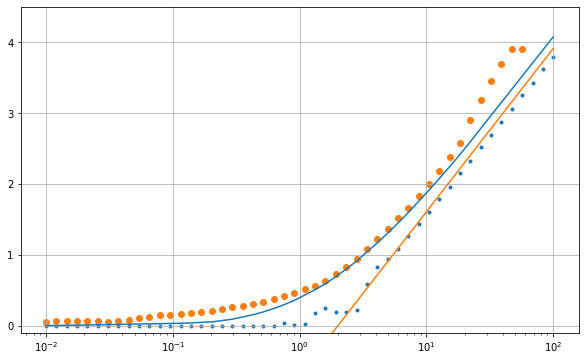

In [19]:
plt.figure(figsize=(10,6))
plt.xscale('log')

# Classical LE
plt.scatter(K,lyapCL,marker='.')

#classical CGR
CGR_c_f=zeros(len(K))
CGR_c_f = savgol_filter(CGR_c,15,1)
plt.plot(K,CGR_c_f)

# classical LE analytical behaviour for large K
plt.plot(K,log(K/2))


# Quantum CGR
lyap_Q_f=zeros(len(K))
lyap_Q_f = savgol_filter(lyap_Q,5,1)
plt.scatter(K[:-3],lyap_Q_f[:-3])

plt.ylim([-0.1,4.5])
plt.grid()
plt.savefig('CGRandLE.png', dpi=100)

PROVA con integrale della funzione che danno loro

In [17]:
import numpy as np
from scipy import integrate

def f(x,K):
    k=K*cos(x)
    return log(abs(1+k/2+sign(k)*sqrt(abs(k*(1+k/4)))))

X = np.arange(-pi,pi,0.01)

lyapArt=zeros(len(K))
for ii in range(len(K)):
    lyapArt[ii]=(1/(2*pi))*(integrate.quad(f, -pi, pi, args=(K[ii]))[0])



<ipython-input-17-ab6763680a44>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lyapArt[ii]=(1/(2*pi))*(integrate.quad(f, -pi, pi, args=(K[ii]))[0])


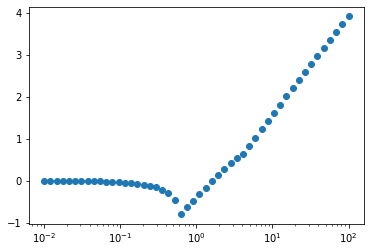

In [209]:
plt.xscale('log')
plt.scatter(K,lyapArt)

